<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Autocorrelation


### Learning Objectives
 
**After this lesson, you will be able to:**
- Define autocorrelation and list some real-world examples.
- Use the Pandas `autocorr()` function to compute autocorrelation.
- Calculate and plot the ACF and PACF using StatsModels and Pandas.
- Explain why autocorrelation poses a problem for models that assume independence.
---    

### Lesson Guide

#### Autocorrelation
- [Autocorrelation](#A)
- [Plotting and Interpreting Autocorrelation Functions](#B)
- [Plotting and Interpreting Partial Autocorrelation Functions](#C)
- [Problems Posed by Autocorrelation](#D)
- [Interpreting the ACF and PACF](#E)
- [Independent Practice](#F)
----

<h2><a id = "A">Autocorrelation</a></h2>

While in previous weeks, our analyses has been concerned with the correlation between two or more variables (height and weight, education and salary, etc.). In time series data, autocorrelation is a measure of _how correlated a variable is with itself_.

Specifically, autocorrelation measures how closely related earlier values are with values that occur later in time.

Examples of autocorrelation include:

    In stock market data, the stock price at one point is correlated with the stock 
    price of the point that's directly prior in time. 
    
    In sales data, sales on a Saturday are likely correlated with 
    sales on the next Saturday and the previous Saturday, as well as other days, to more
    or less of an extent.

> **Check:** What are some examples of autocorrelation that you can think of in the real world?

### How Do We Compute Autocorrelation?

${\Huge R(k) = \frac{\operatorname{E}[(X_{t} - \mu)(X_{t-k} - \mu)]}{\sigma^2}}^*$

To compute autocorrelation, we fix a **lag**, _k_, which is the delta between the given point and the prior point used to compute the [correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient).

With a _k_ value of one, we'd compute how correlated a value is with the prior one. With a _k_ value of 10, we'd compute how correlated a variable is with one that's 10 time points earlier.

$^*$ Note that this formula assumes *stationarity*, which we'll discuss shortly.

### Guided Practice

Last section, we looked at the Rossman Drugstore data to learn how to handle time series data in Pandas. We'll use this same data set to look for autocorrelation. 

We'll import the data and reduce the scope down to one store. Also recall that we need to preprocess the data in Pandas (convert the time data to a `datetime` object and set it as the index of the DataFrame). 

**DayOfWeek** - integer for day of the week (1-7). Note that Sunday store is closed so no sales

**Sales** - the turnover for any given day (usually this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**Promo** - indicates whether a store is running a promo on that day: 0 = no promo, 1 = promo

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. 0 = not State holiday, 1 = State holiday

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools: 0 = No, 1 = Yes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (16.0, 8.0)

data = pd.read_csv('data/rossmann.csv', skipinitialspace=True, low_memory=False)

# Convert data type to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set Date column as index
data = data.set_index('Date')

# Reduce scope to one store only
store1_data = data[data['Store'] == 1]
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1


In [2]:
print("Start date:", store1_data.index.min())
print("End date:", store1_data.index.max())

Start date: 2013-01-01 00:00:00
End date: 2015-07-31 00:00:00


In [3]:
store1_data.shape

(942, 8)

In [4]:
store1_data.groupby('DayOfWeek')['Sales'].mean()

DayOfWeek
1    4946.119403
2    4650.918519
3    4454.474074
4    4094.607407
5    4516.414815
6    4942.970149
7       0.000000
Name: Sales, dtype: float64

In [5]:
store1_data.groupby('DayOfWeek')['Customers'].mean()

DayOfWeek
1    567.768657
2    545.370370
3    530.407407
4    493.407407
5    537.259259
6    597.552239
7      0.000000
Name: Customers, dtype: float64

### Computing Autocorrelation

To compute autocorrelation using the Pandas `.autocorr()` function, we enter the parameter for `lag`. Recall that **lag** is the delta between the given point and the prior point used to compute the autocorrelation. 

With a _k_ value of one, we'd compute how correlated a value is with the value that's immediately prior. With a _k_ value of 10, we'd compute how correlated a variable is with the value that's 10 time points prior.

In [6]:
store1_data['Sales'].autocorr(lag=1)

-0.1273251433914022

In [7]:
store1_data['Sales'].autocorr(lag=10)

0.006307623893789404

Just like with correlation between different variables, the data become more correlated as this number moves closer to one.

<h2><a id = "B">Plotting Autocorrelation Functions Using StatsModels and Pandas</a></h2>

Pandas provides convenience plots for autocorrelations.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

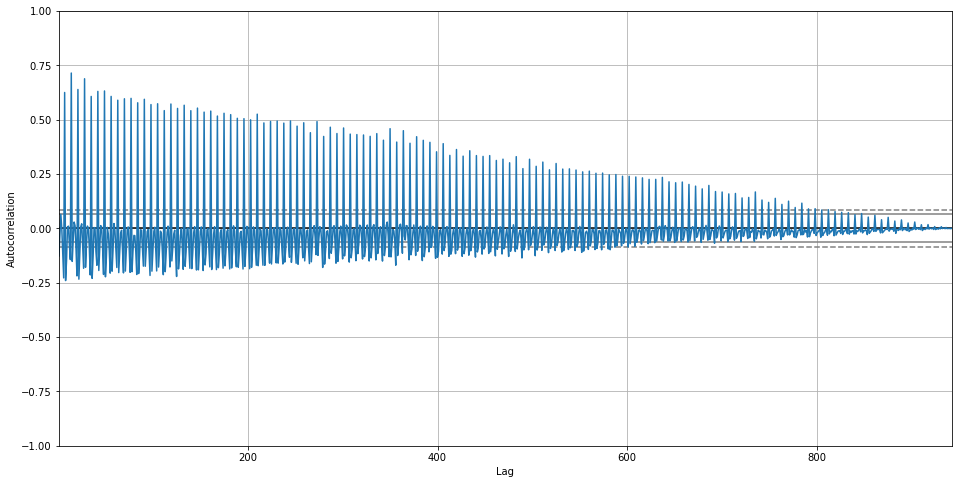

In [8]:
# You can see over time that correlation gets less suggesting trend is present and the first 200 lags are significant
# Shorter lags have larger positive correlations because observations closer in time have similar values
# Suggests non-stationary trend in the sales
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(store1_data.Sales)

StatsModels also comes with some convenient packages for calculating and plotting autocorrelation. Load up these two functions and try them out.

In [9]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

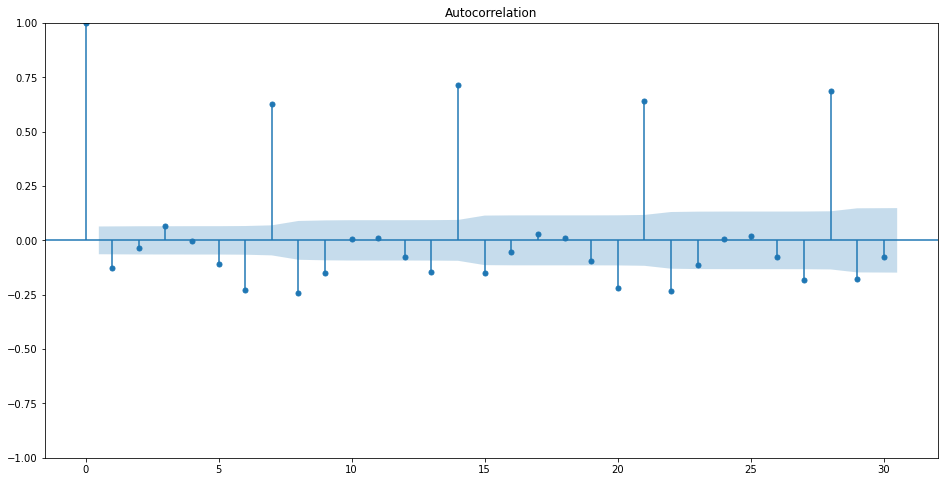

In [10]:
plot_acf(store1_data.Sales.values, lags=30)
plt.show()

This plots the correlation between the series and a lagged series for the lags indicated on the horizontal axis. For instance, at `0`, the series will be completely correlated with itself, so the blue dot is at `1.0`. The points that fall outside of the blue indicate significant correlation values. Big jumps in autocorrelation appear at lags that are multiples of seven. Our sales data are daily, so it makes a lot of sense that a single Monday's sales would be correlated with the prior Monday's (and the one before it... and so on).

Our data set here isn't *stationary* (the mean, the variance, and/or the covariance vary over time), so it isn't appropriate to try to diagnose what forecasting model we should use. However, we can see the seasonality of the data set clearly in the ACF.

In [11]:
acf(store1_data.Sales.values)

array([ 1.        , -0.12703786, -0.03469319,  0.06454937, -0.00180766,
       -0.10904274, -0.22783504,  0.6248786 , -0.2401515 , -0.14869745,
        0.00624578,  0.01006485, -0.07707318, -0.14363042,  0.71435429,
       -0.15188393, -0.05551585,  0.02901103,  0.01113764, -0.09400308,
       -0.21875595,  0.63865175, -0.23360339, -0.11384778,  0.00788378,
        0.02095157, -0.07841381, -0.18374454,  0.68804836, -0.17930762])

<h2><a id= "C">Partial Autocorrelation and the Partial Autocorrelation Function (PACF)</a></h2>

Another important chart for diagnosing your time series is the partial autocorrelation chart (PACF). This is similar to autocorrelation, but, instead of being just the correlation at increasing lags, it is the correlation at a given lag, _controlling for the effect of previous lags._

Load up the sister functions for partial autocorrelation from StatsModels and test them out on the differenced time series.

In [12]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

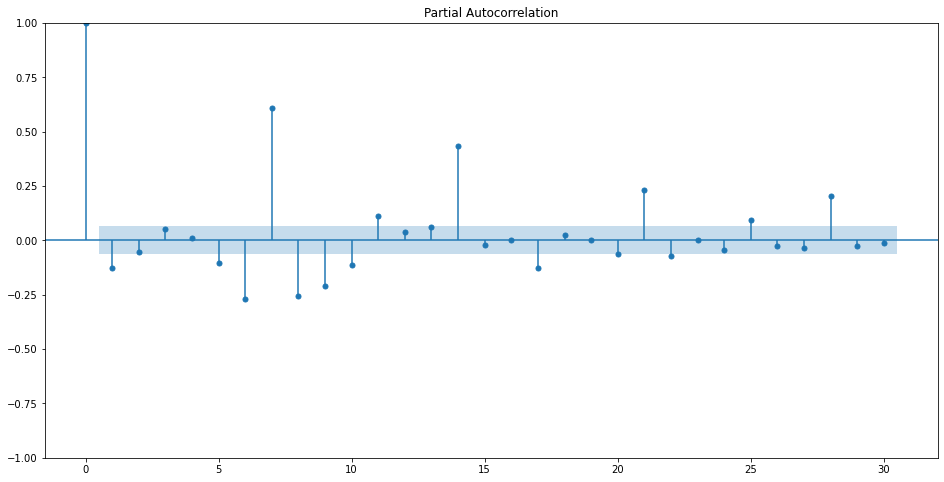

In [13]:
plot_pacf(store1_data.Sales.values, lags=30, method='ywm')
plt.show();

In [ ]:
# Lags 0 and 1 are significantly different
# Lags 6 and 7 are significantly different
# Lags 14 and 15 are significantly different
# Big jumps in correlation at weekly stages suggesting seasonality

This plots the correlation at a given lag (indicated by the horizontal axis), controlling for all of the previous lags. We continue to see big jumps in correlation at the weekly time lags, an indicator that seasonality is still present in our time series. 

In [14]:
pacf(store1_data.Sales.values)

array([ 1.00000000e+00, -1.27172867e-01, -5.17773322e-02,  5.45466222e-02,
        1.23214062e-02, -1.05814185e-01, -2.69339271e-01,  6.13891806e-01,
       -2.64313948e-01, -2.12840451e-01, -1.14091049e-01,  1.16903523e-01,
        3.98957387e-02,  6.13519367e-02,  4.48132326e-01, -2.58046698e-02,
       -7.87918641e-04, -1.32845421e-01,  3.26825588e-02,  2.08959582e-03,
       -6.67821339e-02,  2.51756307e-01, -8.03613671e-02,  3.00956887e-03,
       -5.04939348e-02,  1.07025969e-01, -3.22519598e-02, -4.38687145e-02,
        2.31052301e-01, -4.12160559e-02])

> **Check:** How might seasonality in a data set (monthly, weekly, etc.) show up in autocorrelation plots?

<h2><a id = "D">Problems Posed by Autocorrelation</a></h2>

Models like linear regression analysis require that there is little or no autocorrelation in the data. That is, linear regressions requires that the residuals/error terms are independent of one another. So far, we have assumed all of the independent values in our models have been independent, but this is unlikely with time series data, because the temporal component of time series models means that they will often contain autocorrelation. 

> **What are some problems that could arise when using autocorrelated data with a linear model?**
* Estimated regression coefficients are still unbiased, but they no longer have the minimum variance property.
* The MSE may seriously underestimate the true variance of the errors.
* The standard error of the regression coefficients may seriously underestimate the true standard deviation of the estimated regression coefficients.
* Statistical intervals and inference procedures are no longer strictly applicable.



> **Check:** Why can't we apply linear regression to most time series data sets?

<h2><a id = "E">Interpreting the ACF and the PACF for Use in Forecasting Models</a></h2>

As we learned above, the autocorrelation function (ACF) is a plot of total correlation between different lags. If we decide to use the moving average (MA) method for forecasting, the ACF plot will help us identify the order of the MA model. We can find the lag (the *q* value) for an MA series by determining when the ACF drops off sharply. For an autoregressive (AR) time series, the ACF will go down gradually without any sharp cut-off. 

If the ACF tells us it is an AR series, then we turn to the PACF. If we find out the partial correlation of each lag, it will cut off after the degree of the AR series (the *p* value). For instance, if we have a AR(1) series, the partial correlation function (PACF) will drop sharply after the first lag.

*We'll learn more about AR and MA models in this lesson's bonus section.*

# Recap

* Autocorrelation is a measure of how dependent a data point is on previous data points.
* Investigating ACF and PACF plots can help us identify an appropriate forecasting model and look for seasonality in our time series data.
* Simple linear regression cannot apply to data with autocorrelations because these data no longer have independent errors.

<h2><a id = "F">Independent Practice</a><h2>

**Instructor Note:** These are optional and can be assigned as student practice questions outside of class.

## 1) Import the European Retail data set, preprocess the data, and create an initial plot (Hint: Use `.stack.plot()`).

In [15]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
euro = pd.read_csv('./data/euretail.csv')

In [17]:
euro.head(10)

,Year,Qtr1,Qtr2,Qtr3,Qtr4
0,1996,89.13,89.52,89.88,90.12
1,1997,89.19,89.78,90.03,90.38
2,1998,90.27,90.77,91.85,92.51
3,1999,92.21,92.52,93.62,94.15
4,2000,94.69,95.34,96.04,96.30
5,2001,94.83,95.14,95.86,95.83
6,2002,95.73,96.36,96.89,97.01
7,2003,96.66,97.76,97.83,97.76
8,2004,98.17,98.55,99.31,99.44
9,2005,99.43,99.84,100.32,100.40


In [18]:
euro.dtypes

Year      int64
Qtr1    float64
Qtr2    float64
Qtr3    float64
Qtr4    float64
dtype: object

In [19]:
# Must convert integer to int32 in order to convert to year datetime - otherwise it is parsed weird
euro.Year.astype('int32')

0     1996
1     1997
2     1998
3     1999
4     2000
5     2001
6     2002
7     2003
8     2004
9     2005
10    2006
11    2007
12    2008
13    2009
14    2010
15    2011
Name: Year, dtype: int32

In [20]:
euro['Year'] = pd.to_datetime(euro.Year, format='%Y')

In [ ]:
euro.head()

In [ ]:
# WHAT YOU DO BEFORE SETTING DATES AS INDEX IF YOU WANT TO SET FREQUENCY
#pd.DatetimeIndex(euro.index, freq='AS-JAN')

In [21]:
euro.set_index('Year', inplace=True)

In [22]:
euro.head()

,Qtr1,Qtr2,Qtr3,Qtr4
Year,,,,
1996-01-01,89.13,89.52,89.88,90.12
1997-01-01,89.19,89.78,90.03,90.38
1998-01-01,90.27,90.77,91.85,92.51
1999-01-01,92.21,92.52,93.62,94.15
2000-01-01,94.69,95.34,96.04,96.30


In [23]:
euro.shape

(16, 4)

In [24]:
print("Start date:", euro.index.min())
print("End date:", euro.index.max())

Start date: 1996-01-01 00:00:00
End date: 2011-01-01 00:00:00


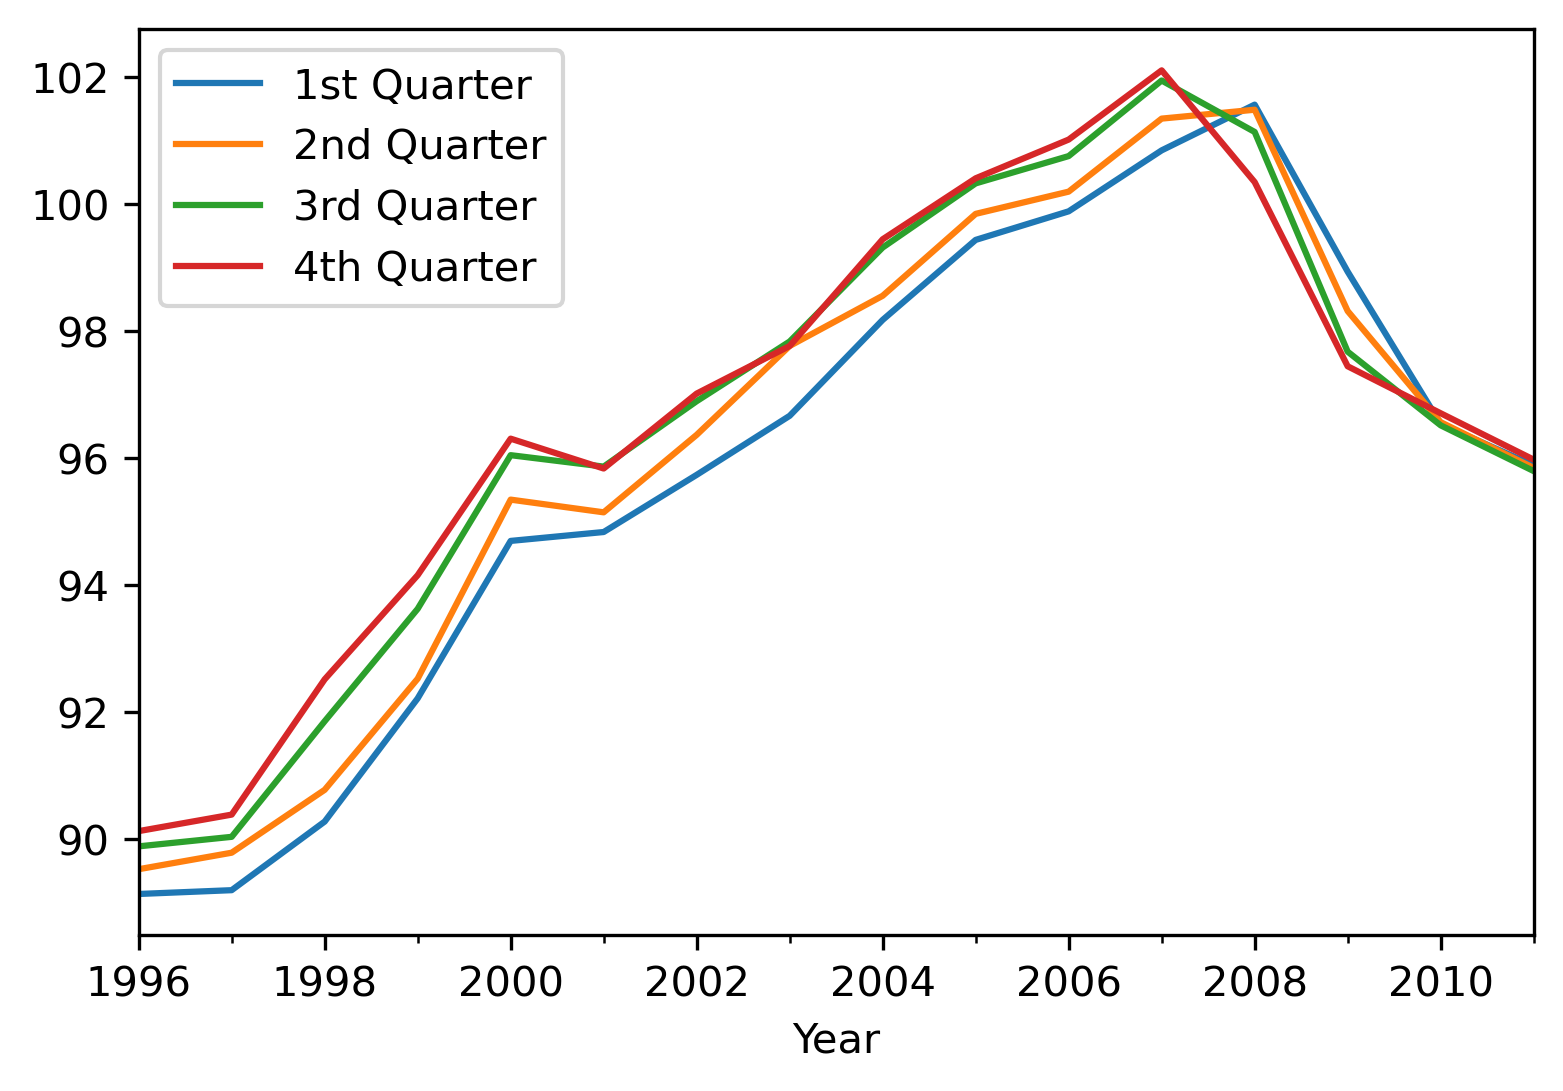

In [32]:
fg, ax = plt.subplots(dpi=300)
euro.Qtr1.plot(ax=ax, label='1st Quarter');
euro.Qtr2.plot(ax=ax, label='2nd Quarter');
euro.Qtr3.plot(ax=ax, label='3rd Quarter');
euro.Qtr4.plot(ax=ax, label='4th Quarter');
ax.legend();

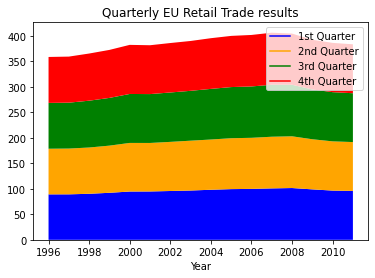

In [34]:
plt.plot([], [], color ='blue', label ='1st Quarter')
plt.plot([], [], color ='orange', label ='2nd Quarter')
plt.plot([], [], color ='green', label ='3rd Quarter')
plt.plot([], [], color ='red', label ='4th Quarter')

plt.stackplot(euro.index, euro.Qtr1, euro.Qtr2, euro.Qtr3, euro.Qtr4, baseline ='zero',
              colors =['blue', 'orange', 'green', 'red'])
plt.legend()
plt.title('Quarterly EU Retail Trade results')
plt.xlabel('Year')
plt.ylabel('')
plt.show()

In [ ]:
# Retail values follow very similar plots for each Quarter so correlation stats will also be similar

## 2) Use `plot_acf` and `plot_pacf` to look at the autocorrelation in the data set.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

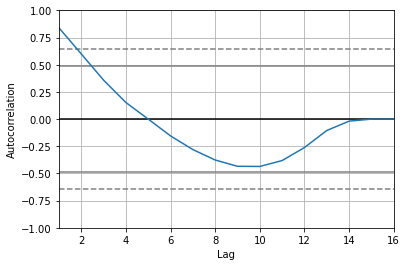

In [35]:
# Pandas ACF for 1st Quarter - gradually dwindles to zero correlation i.e. AR model
# Significant lag values of 1-2 and after lag 2 we go below the threshold so use 2 lags in model
autocorrelation_plot(euro.Qtr1)

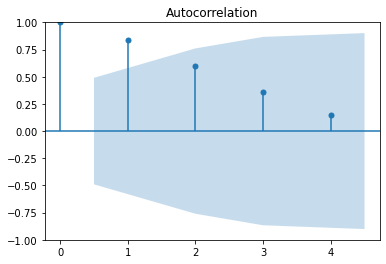

In [45]:
# StatsModel ACF for 1st Quarter - again proves that lag 1 is most significant
plot_acf(euro.Qtr1.values, lags=4)
plt.show()

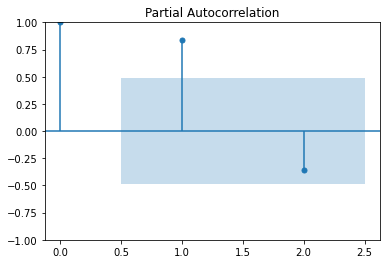

In [47]:
# StatsModel PACF for 1st Quarter - confirms significant correlation in 1st time lag after which becomes much less
plot_pacf(euro.Qtr1.values, lags=2, method='ywm')
plt.show();

In [40]:
euro['Qtr1'].autocorr(lag=1)

0.9399600124923393

In [41]:
euro['Qtr1'].autocorr(lag=2)

0.7989254270630544

In [61]:
euro['Qtr1'].autocorr(lag=3)

0.6366028029281701

In [62]:
# Gets more correlated as lag values move towards 1

## 3) Interpret your findings.

Significant **autocorrelation** between 1-2 time lags, then correlation gets less and less till zero, i.e. not stationary time series, which means retail values close to each other are similar and get less similar as the years go on. 

Significant **partial autocorrelation** in first time lag and after that it gets much less correlated. This indicates first-order AR model. Also, there is no seasonality in time series data.

First-order AutoRegressive model should be appropriate for forecasting. Stats Model has AR model functionality. 

In [63]:
# Frequency of index needs to be set to start of year for AR model 
euro = euro.asfreq(freq='AS-JAN')

In [64]:
X = euro.Qtr1.values

qtr1_train = euro['Qtr1'].iloc[:-4]
qtr1_test = euro['Qtr1'].iloc[-4:]

In [65]:
# NEED TO SET FREQUENCY TO INDEX!
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(qtr1_train, lags=1).fit()

In [66]:
from sklearn import metrics

# Make predictions
qtr1_pred = ar_model.predict(start=len(qtr1_train), end=len(qtr1_train) + len(qtr1_test) -1, dynamic=False)

for i in range(len(qtr1_pred)):
    print('predicted=%f, expected=%f' % (qtr1_pred[i], qtr1_test[i]))
rmse = np.sqrt(metrics.mean_squared_error(qtr1_test, qtr1_pred))
print('Test RMSE: %.3f' % rmse)

predicted=101.743059, expected=101.560000
predicted=102.622887, expected=98.930000
predicted=103.480081, expected=96.530000
predicted=104.315223, expected=95.880000
Test RMSE: 5.769


In [ ]:
# RMSE shows we're off on predictions by approx. 6

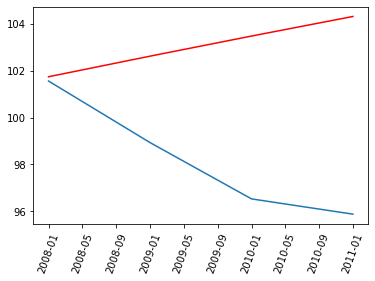

In [67]:
# Plot results
plt.plot(qtr1_test)
plt.plot(qtr1_pred, color='red')
plt.xticks(rotation=70)
plt.show();

In [ ]:
# The prediction starts right, then goes wildly off.